In [8]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

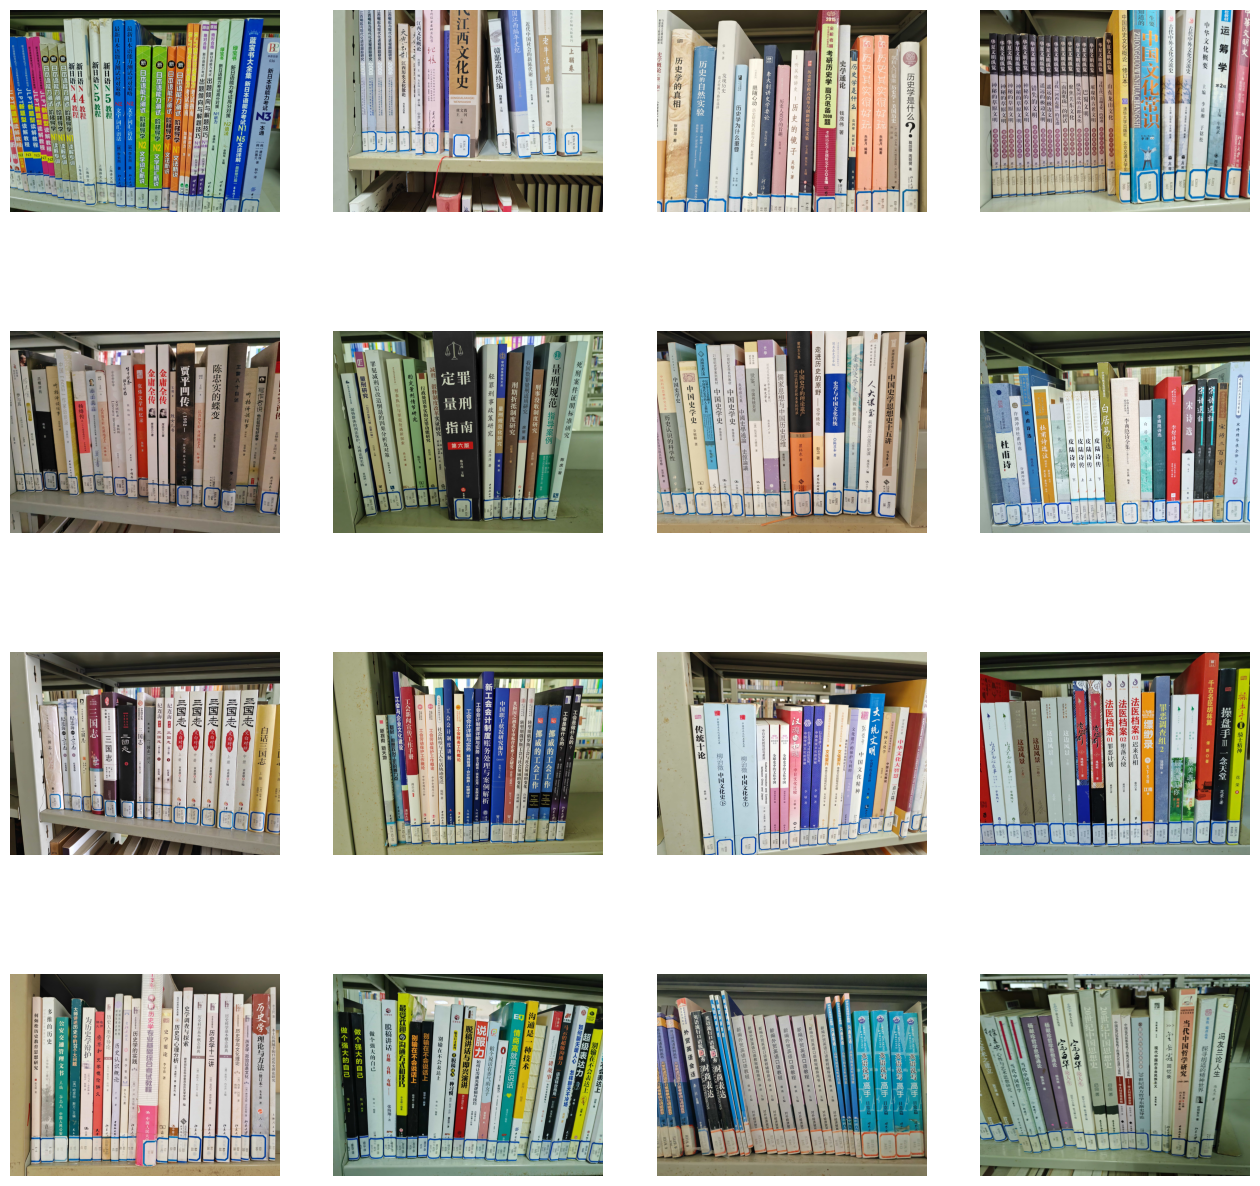

In [13]:
# Corrected file paths using raw strings or forward slashes
train_images = r"E:\data\book-seg-datasetv1.1\train\images"
train_labels = r"E:\data\book-seg-datasetv1.1\train\labels"

test_images = r"E:\data\book-seg-datasetv1.1\test\images"
test_labels = r"E:\data\book-seg-datasetv1.1\test\labels"

val_images = r"E:\data\book-seg-datasetv1.1\validation\images"
val_labels = r"E:\data\book-seg-datasetv1.1\validation\labels"

# Get a list of all the image files in the training images directory
if not os.path.exists(train_images):
    raise FileNotFoundError(f"The directory {train_images} does not exist.")

image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    if not os.path.exists(label_path):
        print(f"Label file not found: {label_path}")
        continue

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width / 2) * image.shape[1])
        y_min = int((y_center - height / 2) * image.shape[0])
        x_max = int((x_center + width / 2) * image.shape[1])
        y_max = int((y_center + height / 2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [17]:
# Load an image using OpenCV
image = cv2.imread(r"E:\data\book-seg-datasetv1.1\test\images\00809.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 3072x4096 and 3 channels.


In [ ]:
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = 'data.yaml',
            epochs = 20,
            imgsz = height,
            seed = 42,
            batch = 32,
            workers = 4)